In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
%matplotlib inline


In [4]:

uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=1)     # To 1

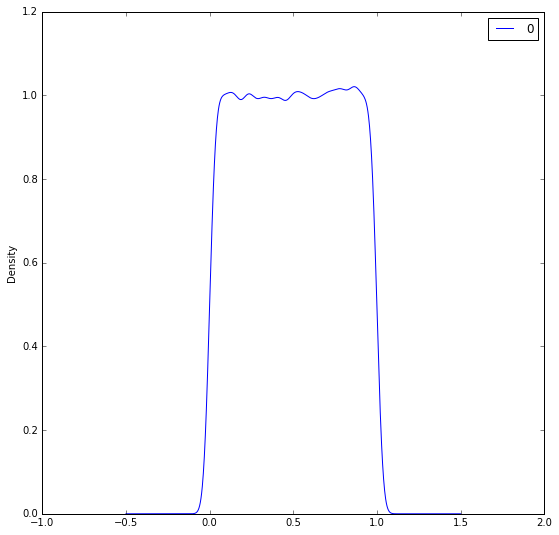

In [5]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,2))

col_0   65  66  67  68  69  70  71   72   73   74 ...   83   84   85   86  \
row_0                                             ...                       
counts   3   2   8  25  27  54  96  139  201  312 ...  747  631  484  307   

col_0    87   88  89  90  91  92  
row_0                             
counts  242  139  54  37  14   2  

[1 rows x 28 columns]
0 flips with probability 1.57772181044e-30
0 flips with probability 1.59349902855e-28
0 flips with probability 7.96907286454e-27
0 flips with probability 2.63086689613e-25
0 flips with probability 6.44968889576e-24
0 flips with probability 1.25232451254e-22
0 flips with probability 2.00595952192e-21
0 flips with probability 2.72614373281e-20
0 flips with probability 3.20856366824e-19
0 flips with probability 3.32204897945e-18
0 flips with probability 3.06329017544e-17
0 flips with probability 2.54085333549e-16
0 flips with probability 1.91135753603e-15
0 flips with probability 1.3129815522e-14
0 flips with probability 8.28445187208e

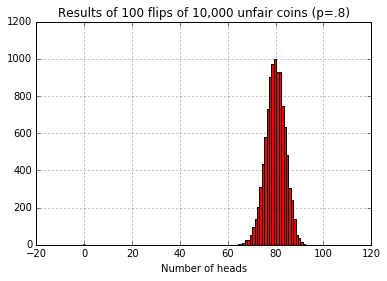

In [104]:
n = 100
fair_coin_flips = stats.binom.rvs(n=n,        # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

count_rejected = 0
count_borderline = 0
line1 = 0
pvals =[]
plt.figure(figsize=(15,12))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,n +.5), bins=n, color='red')
plt.title('Results of {} flips of 10,000 unfair coins (p=.8)'.format(n))
plt.xlabel('Number of heads')
for i in range(n):
    count = 0
    pval = stats.binom.cdf(k=i,        # Probability of k = 5 successes
                n=n,       # With 10 flips
                p=0.5)   
    pval = stats.binom_test(i,        # Probability of k = 5 successes
                n,       # With 10 flips
                p=0.5)
    pvals.append(pval)
    if len(np.bincount(fair_coin_flips)) > i:
        count = np.bincount(fair_coin_flips)[i]
        print '{} flips with probability {}'.format(count, pval)
    if pval < 0.05 / 10000:
        count_rejected = count_rejected + count
    elif pval < 0.065 / 10000:
        count_borderline = count_borderline + count
        line1 = i
        plt.plot((line1, line1), (0, max(np.bincount(fair_coin_flips)) * 2.15), 'k-', color='red')

col_0   31  33  34  35  36  37  38  39   40   41 ...   58   59   60  61  62  \
row_0                                            ...                          
counts   1   2   7  10  21  31  58  70  108  168 ...  244  179  112  57  38   

col_0   63  64  65  66  67  
row_0                       
counts  23  14  11   5   1  

[1 rows x 36 columns]
0 flips with probability 1.57772181044e-30
0 flips with probability 1.59349902855e-28
0 flips with probability 7.96907286454e-27
0 flips with probability 2.63086689613e-25
0 flips with probability 6.44968889576e-24
0 flips with probability 1.25232451254e-22
0 flips with probability 2.00595952192e-21
0 flips with probability 2.72614373281e-20
0 flips with probability 3.20856366824e-19
0 flips with probability 3.32204897945e-18
0 flips with probability 3.06329017544e-17
0 flips with probability 2.54085333549e-16
0 flips with probability 1.91135753603e-15
0 flips with probability 1.3129815522e-14
0 flips with probability 8.28445187208e-14
0 flips 

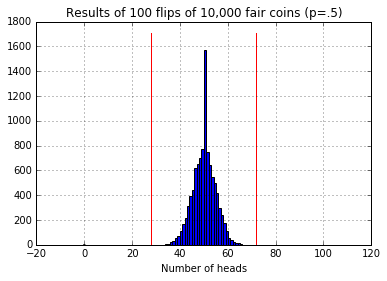

In [103]:
#FDR!
n = 100
fair_coin_flips = stats.binom.rvs(n=n,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

count_rejected = 0
count_borderline = 0
line1 = 0
pvals = []
pvals_individual = []
plt.figure(figsize=(15,12))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,n +.5), bins=n)
plt.title('Results of {} flips of 10,000 fair coins (p=.5)'.format(n))
plt.xlabel('Number of heads')
ranking = 1
for i in range(n):
    count = 0
    pval = stats.binom.cdf(k=i,        # Probability of k = 5 successes
                n=n,       # With 10 flips
                p=0.5)   
    pval = stats.binom_test(i,        # Probability of k = 5 successes
                n,       # With 10 flips
                p=0.5)
    pvals.append(pval)
    if len(np.bincount(fair_coin_flips)) > i:
        count = np.bincount(fair_coin_flips)[i]
        print '{} flips with probability {}'.format(count, pval)
    if pval < ((0.05 * ranking )/ 10000):
        count_rejected = count_rejected + count
    elif pval < ((0.205 * ranking )/ 10000):
        count_borderline = count_borderline + count
        if line1 == 0:
            line1 = i
            plt.plot((line1, line1), (0, max(np.bincount(fair_coin_flips)) * 2.15), 'k-', color='red')
            print n - line1
            plt.plot((n - line1, n - line1), (0, max(np.bincount(fair_coin_flips)) * 2.15), 'k-', color='red')
    ranking = ranking + count

col_0   64  65  66  67  68  69  70  71   72   73 ...   84   85   86   87   88  \
row_0                                            ...                            
counts   3   3   3   7  19  33  49  81  139  202 ...  671  459  336  234  139   

col_0   89  90  91  92  93  
row_0                       
counts  56  27  16   7   1  

[1 rows x 30 columns]
0 flips with probability 1.57772181044e-30
0 flips with probability 1.59349902855e-28
0 flips with probability 7.96907286454e-27
0 flips with probability 2.63086689613e-25
0 flips with probability 6.44968889576e-24
0 flips with probability 1.25232451254e-22
0 flips with probability 2.00595952192e-21
0 flips with probability 2.72614373281e-20
0 flips with probability 3.20856366824e-19
0 flips with probability 3.32204897945e-18
0 flips with probability 3.06329017544e-17
0 flips with probability 2.54085333549e-16
0 flips with probability 1.91135753603e-15
0 flips with probability 1.3129815522e-14
0 flips with probability 8.28445187208e-14
0 

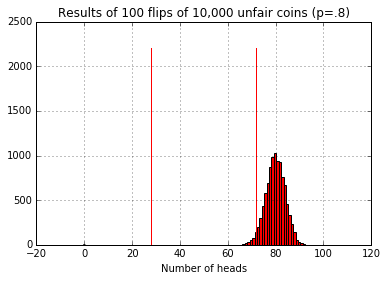

In [108]:
#FDR!
n = 100
fair_coin_flips = stats.binom.rvs(n=n,        # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

count_rejected = 0
count_borderline = 0
line1 = 0
pvals = []
pvals_individual = []
plt.figure(figsize=(15,12))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,n +.5), bins=n, color='red')
plt.title('Results of {} flips of 10,000 unfair coins (p=.8)'.format(n))
plt.xlabel('Number of heads')
ranking = 1
for i in range(n):
    count = 0
    pval = stats.binom.cdf(k=i,        # Probability of k = 5 successes
                n=n,       # With 10 flips
                p=0.5)   
    pval = stats.binom_test(i,        # Probability of k = 5 successes
                n,       # With 10 flips
                p=0.5)
    pvals.append(pval)
    if len(np.bincount(fair_coin_flips)) > i:
        count = np.bincount(fair_coin_flips)[i]
        print '{} flips with probability {}'.format(count, pval)
    if pval < ((0.05 * ranking )/ 10000):
        count_rejected = count_rejected + count
    elif pval < ((0.205 * ranking )/ 10000):
        count_borderline = count_borderline + count
        if line1 == 0:
            line1 = i
            plt.plot((line1, line1), (0, max(np.bincount(fair_coin_flips)) * 2.15), 'k-', color='red')
            print n - line1
            plt.plot((n - line1, n - line1), (0, max(np.bincount(fair_coin_flips)) * 2.15), 'k-', color='red')
    ranking = ranking + count

In [107]:
count_rejected

9959

In [51]:
 np.bincount(fair_coin_flips)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,    2,    1,    4,   21,   45,   75,  178,  271,  448,  605,
        807,  926, 1058, 1155, 1027,  965,  765,  588,  404,  292,  187,
         98,   46,   18,    6,    5,    0,    1])

In [13]:
stats.binom.cdf(0.5, 10, 0.5, 10000)

0.0

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   9  63  252  888  2043  3017  2648  1079


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157c57d0>]], dtype=object)

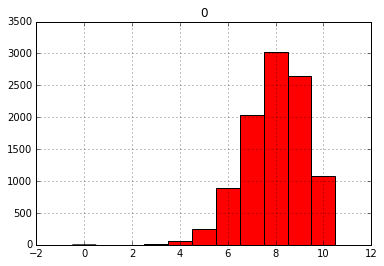

In [8]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11, color='red')

In [39]:
[40:50]

SyntaxError: invalid syntax (<ipython-input-39-33a789bff707>, line 1)